In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('max_reduce.csv')

df.head()

,Unnamed: 0,SEX,AGE,SYSBP,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,STROKE,educ,CVD,ANGINA,TOTCHOL
0,0,1,39,106.0,0.0,26.97,0,0.0,80.0,77.0,0,4.0,1,0,195.0
1,2,2,46,121.0,0.0,28.73,0,0.0,95.0,76.0,0,2.0,0,0,250.0
2,3,2,52,105.0,0.0,29.43,0,0.0,80.0,86.0,0,2.0,0,0,260.0
3,4,2,58,108.0,0.0,28.50,0,0.0,80.0,71.0,0,2.0,0,0,237.0
4,5,1,48,127.5,20.0,25.34,0,0.0,75.0,70.0,0,1.0,0,0,245.0


In [5]:
df = df.drop(['Unnamed: 0'], axis=1)

In [6]:
predictor = "CVD"

In [7]:
target = df[[predictor]]

In [8]:
data = df.drop([predictor], axis=1)
feature_names = data.columns
data.head()

,SEX,AGE,SYSBP,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,STROKE,educ,ANGINA,TOTCHOL
0,1,39,106.0,0.0,26.97,0,0.0,80.0,77.0,0,4.0,0,195.0
1,2,46,121.0,0.0,28.73,0,0.0,95.0,76.0,0,2.0,0,250.0
2,2,52,105.0,0.0,29.43,0,0.0,80.0,86.0,0,2.0,0,260.0
3,2,58,108.0,0.0,28.50,0,0.0,80.0,71.0,0,2.0,0,237.0
4,1,48,127.5,20.0,25.34,0,0.0,75.0,70.0,0,1.0,0,245.0


In [9]:
print(data.shape, target.shape)

(9310, 13) (9310, 1)


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [11]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [12]:
# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

network architecture

In [13]:
from keras.models import Sequential
from keras.layers import Dense

In [14]:
# clear session a couple times and restart kernel if accuracy gets stuck
from keras import backend
backend.clear_session()
backend.clear_session()
backend.clear_session()
backend.clear_session()
backend.clear_session()

In [15]:
# Create model and add layers
# network architecture: [17, 15, 12, 10, 6, 4, 2]
model = Sequential()
model.add(Dense(units=12, activation='relu', input_dim=13))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [16]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# accuracy before training
# make sure this accuracy is low
model_loss, model_accuracy = model.evaluate(
    X_test, y_test_categorical, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 5.688988366077855, Accuracy: 0.3161512027491409


In [18]:
history = model.fit(
    X_train,
    y_train_categorical,
    epochs=1000,
    shuffle=True,
    verbose=2
)

Epoch 1/1000
 - 1s - loss: 0.9064 - acc: 0.7160
Epoch 2/1000
 - 0s - loss: 0.5734 - acc: 0.7478
Epoch 3/1000
 - 0s - loss: 0.5646 - acc: 0.7486
Epoch 4/1000
 - 0s - loss: 0.5615 - acc: 0.7486
Epoch 5/1000
 - 0s - loss: 0.5535 - acc: 0.7491
Epoch 6/1000
 - 0s - loss: 0.5500 - acc: 0.7491
Epoch 7/1000
 - 0s - loss: 0.5445 - acc: 0.7498
Epoch 8/1000
 - 0s - loss: 0.5389 - acc: 0.7535
Epoch 9/1000
 - 0s - loss: 0.5311 - acc: 0.7531
Epoch 10/1000
 - 0s - loss: 0.5305 - acc: 0.7562
Epoch 11/1000
 - 0s - loss: 0.5180 - acc: 0.7638
Epoch 12/1000
 - 0s - loss: 0.5046 - acc: 0.7678
Epoch 13/1000
 - 0s - loss: 0.4784 - acc: 0.7817
Epoch 14/1000
 - 0s - loss: 0.4659 - acc: 0.7912
Epoch 15/1000
 - 0s - loss: 0.4396 - acc: 0.8092
Epoch 16/1000
 - 0s - loss: 0.4157 - acc: 0.8228
Epoch 17/1000
 - 0s - loss: 0.4055 - acc: 0.8329
Epoch 18/1000
 - 0s - loss: 0.3983 - acc: 0.8326
Epoch 19/1000
 - 0s - loss: 0.3928 - acc: 0.8334
Epoch 20/1000
 - 0s - loss: 0.3792 - acc: 0.8416
Epoch 21/1000
 - 0s - loss: 0

 - 0s - loss: 0.3409 - acc: 0.8546
Epoch 168/1000
 - 0s - loss: 0.3391 - acc: 0.8531
Epoch 169/1000
 - 0s - loss: 0.3436 - acc: 0.8528
Epoch 170/1000
 - 0s - loss: 0.3395 - acc: 0.8549
Epoch 171/1000
 - 0s - loss: 0.3391 - acc: 0.8569
Epoch 172/1000
 - 0s - loss: 0.3371 - acc: 0.8553
Epoch 173/1000
 - 0s - loss: 0.3378 - acc: 0.8553
Epoch 174/1000
 - 0s - loss: 0.3389 - acc: 0.8575
Epoch 175/1000
 - 0s - loss: 0.3379 - acc: 0.8543
Epoch 176/1000
 - 0s - loss: 0.3389 - acc: 0.8542
Epoch 177/1000
 - 0s - loss: 0.3395 - acc: 0.8584
Epoch 178/1000
 - 0s - loss: 0.3380 - acc: 0.8558
Epoch 179/1000
 - 0s - loss: 0.3432 - acc: 0.8565
Epoch 180/1000
 - 0s - loss: 0.3391 - acc: 0.8548
Epoch 181/1000
 - 0s - loss: 0.3387 - acc: 0.8526
Epoch 182/1000
 - 0s - loss: 0.3376 - acc: 0.8561
Epoch 183/1000
 - 0s - loss: 0.3366 - acc: 0.8555
Epoch 184/1000
 - 0s - loss: 0.3401 - acc: 0.8541
Epoch 185/1000
 - 0s - loss: 0.3390 - acc: 0.8569
Epoch 186/1000
 - 0s - loss: 0.3406 - acc: 0.8576
Epoch 187/1000


 - 0s - loss: 0.3348 - acc: 0.8569
Epoch 332/1000
 - 0s - loss: 0.3327 - acc: 0.8571
Epoch 333/1000
 - 0s - loss: 0.3337 - acc: 0.8594
Epoch 334/1000
 - 0s - loss: 0.3359 - acc: 0.8572
Epoch 335/1000
 - 0s - loss: 0.3341 - acc: 0.8592
Epoch 336/1000
 - 0s - loss: 0.3356 - acc: 0.8565
Epoch 337/1000
 - 0s - loss: 0.3347 - acc: 0.8559
Epoch 338/1000
 - 0s - loss: 0.3389 - acc: 0.8548
Epoch 339/1000
 - 0s - loss: 0.3356 - acc: 0.8586
Epoch 340/1000
 - 0s - loss: 0.3350 - acc: 0.8573
Epoch 341/1000
 - 0s - loss: 0.3370 - acc: 0.8562
Epoch 342/1000
 - 0s - loss: 0.3381 - acc: 0.8563
Epoch 343/1000
 - 0s - loss: 0.3334 - acc: 0.8571
Epoch 344/1000
 - 0s - loss: 0.3330 - acc: 0.8591
Epoch 345/1000
 - 0s - loss: 0.3352 - acc: 0.8552
Epoch 346/1000
 - 0s - loss: 0.3374 - acc: 0.8571
Epoch 347/1000
 - 0s - loss: 0.3357 - acc: 0.8568
Epoch 348/1000
 - 0s - loss: 0.3344 - acc: 0.8573
Epoch 349/1000
 - 0s - loss: 0.3329 - acc: 0.8584
Epoch 350/1000
 - 0s - loss: 0.3354 - acc: 0.8576
Epoch 351/1000


 - 0s - loss: 0.3322 - acc: 0.8584
Epoch 496/1000
 - 0s - loss: 0.3314 - acc: 0.8571
Epoch 497/1000
 - 0s - loss: 0.3302 - acc: 0.8551
Epoch 498/1000
 - 0s - loss: 0.3310 - acc: 0.8575
Epoch 499/1000
 - 0s - loss: 0.3300 - acc: 0.8572
Epoch 500/1000
 - 0s - loss: 0.3314 - acc: 0.8579
Epoch 501/1000
 - 0s - loss: 0.3311 - acc: 0.8591
Epoch 502/1000
 - 0s - loss: 0.3314 - acc: 0.8591
Epoch 503/1000
 - 0s - loss: 0.3323 - acc: 0.8561
Epoch 504/1000
 - 0s - loss: 0.3327 - acc: 0.8576
Epoch 505/1000
 - 0s - loss: 0.3299 - acc: 0.8569
Epoch 506/1000
 - 0s - loss: 0.3315 - acc: 0.8599
Epoch 507/1000
 - 0s - loss: 0.3323 - acc: 0.8585
Epoch 508/1000
 - 0s - loss: 0.3300 - acc: 0.8586
Epoch 509/1000
 - 0s - loss: 0.3280 - acc: 0.8602
Epoch 510/1000
 - 0s - loss: 0.3299 - acc: 0.8573
Epoch 511/1000
 - 0s - loss: 0.3324 - acc: 0.8588
Epoch 512/1000
 - 0s - loss: 0.3287 - acc: 0.8585
Epoch 513/1000
 - 0s - loss: 0.3284 - acc: 0.8585
Epoch 514/1000
 - 0s - loss: 0.3322 - acc: 0.8585
Epoch 515/1000


 - 0s - loss: 0.3260 - acc: 0.8604
Epoch 660/1000
 - 0s - loss: 0.3290 - acc: 0.8604
Epoch 661/1000
 - 0s - loss: 0.3284 - acc: 0.8612
Epoch 662/1000
 - 0s - loss: 0.3284 - acc: 0.8615
Epoch 663/1000
 - 0s - loss: 0.3288 - acc: 0.8592
Epoch 664/1000
 - 0s - loss: 0.3286 - acc: 0.8609
Epoch 665/1000
 - 0s - loss: 0.3292 - acc: 0.8606
Epoch 666/1000
 - 0s - loss: 0.3258 - acc: 0.8622
Epoch 667/1000
 - 0s - loss: 0.3281 - acc: 0.8632
Epoch 668/1000
 - 0s - loss: 0.3255 - acc: 0.8625
Epoch 669/1000
 - 0s - loss: 0.3311 - acc: 0.8596
Epoch 670/1000
 - 0s - loss: 0.3307 - acc: 0.8589
Epoch 671/1000
 - 0s - loss: 0.3273 - acc: 0.8634
Epoch 672/1000
 - 0s - loss: 0.3276 - acc: 0.8608
Epoch 673/1000
 - 0s - loss: 0.3279 - acc: 0.8608
Epoch 674/1000
 - 0s - loss: 0.3242 - acc: 0.8604
Epoch 675/1000
 - 0s - loss: 0.3284 - acc: 0.8604
Epoch 676/1000
 - 0s - loss: 0.3271 - acc: 0.8614
Epoch 677/1000
 - 0s - loss: 0.3277 - acc: 0.8599
Epoch 678/1000
 - 0s - loss: 0.3289 - acc: 0.8584
Epoch 679/1000


 - 0s - loss: 0.3250 - acc: 0.8621
Epoch 824/1000
 - 0s - loss: 0.3245 - acc: 0.8621
Epoch 825/1000
 - 0s - loss: 0.3248 - acc: 0.8628
Epoch 826/1000
 - 0s - loss: 0.3243 - acc: 0.8644
Epoch 827/1000
 - 0s - loss: 0.3251 - acc: 0.8605
Epoch 828/1000
 - 0s - loss: 0.3248 - acc: 0.8642
Epoch 829/1000
 - 0s - loss: 0.3238 - acc: 0.8641
Epoch 830/1000
 - 0s - loss: 0.3231 - acc: 0.8624
Epoch 831/1000
 - 0s - loss: 0.3255 - acc: 0.8605
Epoch 832/1000
 - 0s - loss: 0.3252 - acc: 0.8618
Epoch 833/1000
 - 0s - loss: 0.3266 - acc: 0.8634
Epoch 834/1000
 - 0s - loss: 0.3248 - acc: 0.8632
Epoch 835/1000
 - 0s - loss: 0.3278 - acc: 0.8611
Epoch 836/1000
 - 0s - loss: 0.3235 - acc: 0.8632
Epoch 837/1000
 - 0s - loss: 0.3265 - acc: 0.8601
Epoch 838/1000
 - 0s - loss: 0.3247 - acc: 0.8632
Epoch 839/1000
 - 0s - loss: 0.3243 - acc: 0.8604
Epoch 840/1000
 - 0s - loss: 0.3261 - acc: 0.8642
Epoch 841/1000
 - 0s - loss: 0.3226 - acc: 0.8644
Epoch 842/1000
 - 0s - loss: 0.3259 - acc: 0.8621
Epoch 843/1000


 - 0s - loss: 0.3249 - acc: 0.8614
Epoch 988/1000
 - 0s - loss: 0.3252 - acc: 0.8615
Epoch 989/1000
 - 0s - loss: 0.3234 - acc: 0.8624
Epoch 990/1000
 - 0s - loss: 0.3239 - acc: 0.8626
Epoch 991/1000
 - 0s - loss: 0.3259 - acc: 0.8625
Epoch 992/1000
 - 0s - loss: 0.3241 - acc: 0.8629
Epoch 993/1000
 - 0s - loss: 0.3254 - acc: 0.8636
Epoch 994/1000
 - 0s - loss: 0.3263 - acc: 0.8599
Epoch 995/1000
 - 0s - loss: 0.3240 - acc: 0.8622
Epoch 996/1000
 - 0s - loss: 0.3225 - acc: 0.8638
Epoch 997/1000
 - 0s - loss: 0.3283 - acc: 0.8606
Epoch 998/1000
 - 0s - loss: 0.3234 - acc: 0.8642
Epoch 999/1000
 - 0s - loss: 0.3228 - acc: 0.8624
Epoch 1000/1000
 - 0s - loss: 0.3217 - acc: 0.8652


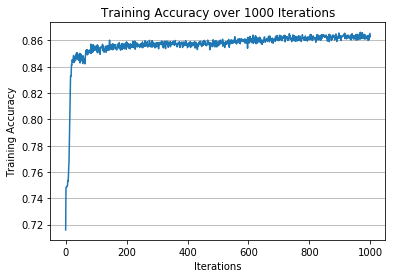

In [19]:
# accuracy should increase over epochs
plt.plot(history.history['acc'])
plt.title('Training Accuracy over 1000 Iterations')
plt.ylabel('Training Accuracy')
plt.xlabel('Iterations')
plt.grid(axis='y')

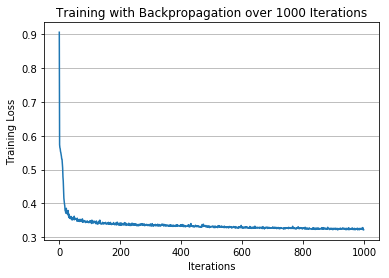

In [20]:
# loss is sum of error on training set
# error should decrease over epochs, steeper the better
plt.plot(history.history['loss'])
plt.title('Training with Backpropagation over 1000 Iterations')
plt.ylabel('Training Loss')
plt.xlabel('Iterations')
plt.grid(axis='y')

In [21]:
# accuracy after training
model_loss, model_accuracy = model.evaluate(
    X_test, y_test_categorical, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.3472342229995531, Accuracy: 0.8556701028879565


In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
label_encoder = LabelEncoder()
label_encoder.fit(df[predictor])

LabelEncoder()

In [24]:
encoded_predictions = model.predict_classes(X_test)
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

/Users/ken_r/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [25]:
test_df = pd.DataFrame({'predicted':prediction_labels,'actual':np.ravel(y_test)})
test_df.head()

,predicted,actual
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0


In [26]:
corr = 0
wron = 0

for index, row in test_df.iterrows():
    if row['predicted'] == row['actual']:
        corr = corr + 1
    else:
        wron = wron + 1
        
print(f'Correct predictions: {corr}')
print(f'Incorrect predictions: {wron}')

Correct predictions: 1992
Incorrect predictions: 336
